In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd


In [9]:
def detect_essay_subjects(essays):
    # Create a CountVectorizer to convert the essays into a matrix of word counts
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(essays)

    # Use LatentDirichletAllocation to perform topic modeling
    n_topics = 5
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(X)

    # Print the top 10 words for each topic
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda.components_):
        print(f"Topic #{topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-11:-1]]))
        print()

    # Return the predicted topics for each essay
    return lda.transform(X)





In [24]:
def detect_essay_subjects2(essays):
    # Vectorize the essays
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(essays)

    # Train an LDA model
    lda = LatentDirichletAllocation(n_components=5, random_state=0)
    lda.fit(X)

    # Get the topic words for each topic
    feature_names = vectorizer.get_feature_names_out()
    topic_words = []
    for topic_idx, topic in enumerate(lda.components_):
        top_words_idx = topic.argsort()[:-11:-1]
        top_words = [feature_names[i] for i in top_words_idx]
        topic_words.append(top_words)

    # Get the most likely topic for each essay
    essay_topics = []
    for essay in essays:
        essay_vector = vectorizer.transform([essay])
        topic_proportions = lda.transform(essay_vector)
        most_likely_topic = topic_proportions.argmax()
        essay_topics.append(topic_words[most_likely_topic])

    return essay_topics, vectorizer, lda

In [3]:
df = pd.read_excel("./asap-aes/training_set_rel3.xlsx")
df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# Assume your vector of essays is stored in a variable called 'essays'
essays = df['essay']

#essay_topics = detect_essay_subjects(essays)


In [25]:
essay_topics2, vect, lda_model = detect_essay_subjects2(essays)

In [20]:
essay_topics2[:10]

[['people',
  'computers',
  'computer',
  'family',
  'time',
  'caps1',
  'mood',
  'parents',
  'friends',
  'life'],
 ['people',
  'computers',
  'computer',
  'family',
  'time',
  'caps1',
  'mood',
  'parents',
  'friends',
  'life'],
 ['people',
  'computers',
  'computer',
  'family',
  'time',
  'caps1',
  'mood',
  'parents',
  'friends',
  'life'],
 ['people',
  'computers',
  'computer',
  'family',
  'time',
  'caps1',
  'mood',
  'parents',
  'friends',
  'life'],
 ['people',
  'computers',
  'computer',
  'family',
  'time',
  'caps1',
  'mood',
  'parents',
  'friends',
  'life'],
 ['people',
  'computers',
  'computer',
  'family',
  'time',
  'caps1',
  'mood',
  'parents',
  'friends',
  'life'],
 ['people',
  'computers',
  'computer',
  'family',
  'time',
  'caps1',
  'mood',
  'parents',
  'friends',
  'life'],
 ['people',
  'computers',
  'computer',
  'family',
  'time',
  'caps1',
  'mood',
  'parents',
  'friends',
  'life'],
 ['people',
  'computers',
  'co

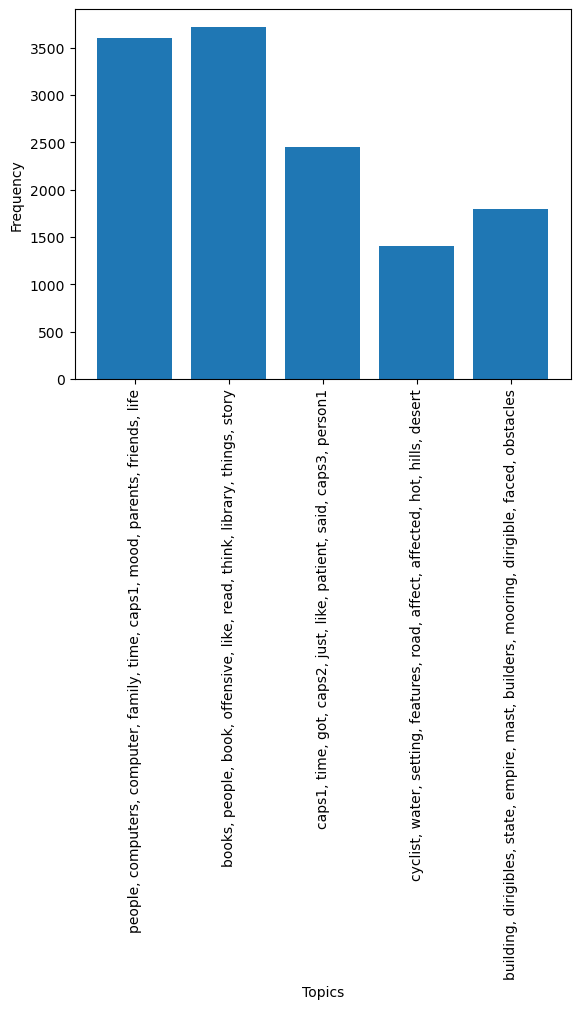

In [15]:
from collections import Counter
import matplotlib.pyplot as plt

# Count the frequency of each topic
topic_counts = Counter([tuple(topic) for topic in essay_topics2])

# Create a bar chart of the topic frequencies
plt.bar(range(len(topic_counts)), list(topic_counts.values()), align='center')
plt.xticks(range(len(topic_counts)), [', '.join(topic) for topic in topic_counts.keys()], rotation=90)
plt.ylabel('Frequency')
plt.xlabel('Topics')
plt.show()


In [26]:
def get_topic_labels(lda_model, vectorizer, essay):
    # Vectorize the essay
    essay_vector = vectorizer.transform([essay])
    # Get the topic probabilities for the essay
    topic_probs = lda_model.transform(essay_vector)[0]
    # Get the index of the topic with the highest probability
    max_topic_idx = np.argmax(topic_probs)
    # Get the label of the topic with the highest probability
    topic_label = ', '.join([t[0] for t in lda_model.show_topic(max_topic_idx)])
    return topic_label

topics = [get_topic_labels(lda_model, vect, essay_topics2) for essay in essay_topics2]


AttributeError: 'list' object has no attribute 'lower'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_topic_histogram(topics):
    # Count the frequency of each topic
    topic_counts = Counter(map(tuple, topics))

    # Sort the topics in descending order of frequency
    sorted_topics = sorted(topic_counts.items(), key=lambda x: x[1], reverse=True)

    # Extract the topic labels and frequency counts as separate lists
    topic_labels, topic_frequencies = zip(*sorted_topics)

    # Set up the histogram plot
    plt.bar(range(len(topic_labels)), topic_frequencies)

    # Set the x-axis tick labels to the topic labels
    plt.xticks(range(len(topic_labels)), topic_labels, rotation=90)

    # Set the y-axis tick range to start at zero
    plt.ylim(ymin=0)

    # Show the plot
    plt.show()

plot_topic_histogram(essay_topics2)

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
import matplotlib.pyplot as plt


def detect_essay_subjects(essays):
    # Instantiate a CountVectorizer
    vectorizer = CountVectorizer(stop_words='english')

    # Fit and transform the vectorizer on the input essays
    X = vectorizer.fit_transform(essays)

    # Instantiate and fit a Latent Dirichlet Allocation (LDA) model on the essay vectors
    lda = LatentDirichletAllocation(n_components=5, random_state=0)
    lda.fit(X)

    # Get the topic distributions for each document
    doc_topic_matrix = lda.transform(X)

    # Get the top 10 words for each topic
    feature_names = vectorizer.get_feature_names_out()
    topics = {}
    for topic_idx, topic in enumerate(lda.components_):
        topic_name = f"Topic #{topic_idx}"
        topics[topic_name] = [feature_names[i] for i in topic.argsort()[:-11:-1]]

    return topics


def predict_essay_topic(essay, lda, vectorizer):
    # Transform the essay using the fitted vectorizer
    X = vectorizer.transform([essay])

    # Get the topic probabilities for the essay
    topic_probs = lda.transform(X)

    # Find the index of the most likely topic
    topic_idx = np.argmax(topic_probs)

    # Return the name of the most likely topic
    return f"Topic #{topic_idx}"


def plot_topic_histogram(essay_topics):
    # Create a dictionary to hold the topic frequencies
    topic_frequencies = {}

    # Loop through the essay topics and count the number of occurrences of each topic
    for essay_topic in essay_topics:
        if essay_topic in topic_frequencies:
            topic_frequencies[essay_topic] += 1
        else:
            topic_frequencies[essay_topic] = 1

    # Convert the topic frequencies to a list of tuples and sort it by frequency in descending order
    sorted_topic_frequencies = sorted(topic_frequencies.items(), key=lambda x: x[1], reverse=True)

    # Create a bar plot of the topic frequencies
    topics, frequencies = zip(*sorted_topic_frequencies)
    plt.bar(topics, frequencies)
    plt.title("Essay Topic Frequencies")
    plt.xlabel("Topic")
    plt.ylabel("Frequency")
    plt.show()


In [37]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

def detect_essay_subjects(essays):
    # Initialize the count vectorizer
    vectorizer = CountVectorizer(stop_words='english')

    # Fit and transform the input essays
    X = vectorizer.fit_transform(essays)

    # Initialize the LDA model
    lda = LatentDirichletAllocation(n_components=5, random_state=42)

    # Fit the LDA model
    lda.fit(X)

    # Get the topic distributions for each document
    doc_topic_matrix = lda.transform(X)

    # Get the top 10 words for each topic
    feature_names = vectorizer.get_feature_names_out()
    topics = []
    for topic_idx, topic in enumerate(lda.components_):
        topic_words = ", ".join([feature_names[i] for i in topic.argsort()[:-11:-1]])
        topics.append(topic_words)
        print(f"Topic #{topic_idx}: {topic_words}")

    return doc_topic_matrix, topics, lda, vectorizer


def predict_essay_subject(essay, lda, vectorizer):
    # Transform the essay into a document-term matrix
    X = vectorizer.transform([essay])

    # Use LDA to transform the document-term matrix into a topic distribution
    topic_distribution = lda.transform(X)[0]

    # Find the index of the most likely topic
    most_likely_topic_index = topic_distribution.argmax()

    # Get the list of feature names from the vectorizer
    feature_names = vectorizer.get_feature_names_out()

    # Get the top words for the most likely topic
    top_words = [feature_names[i] for i in lda.components_[most_likely_topic_index].argsort()[:-11:-1]]

    # Return the most likely topic and its top words
    return (most_likely_topic_index, top_words)


# Detect the essay topics and get the LDA model and vectorizer
doc_topic_matrix, topics, lda, vectorizer = detect_essay_subjects(essays)

# Predict the most likely topic for each essay
predicted_topics = predict_essay_subject(doc_topic_matrix, lda, vectorizer)

# Count the frequency of each topic and display it in a histogram
import matplotlib.pyplot as plt

unique_topics, topic_counts = np.unique(predicted_topics, return_counts=True)

plt.bar(unique_topics, topic_counts)
plt.xlabel('Essay topic')
plt.ylabel('Frequency')
plt.title('Essay topic frequency')
plt.show()


Topic #0: people, computers, computer, time, friends, caps1, like, use, just, caps2
Topic #1: building, dirigibles, state, empire, mast, builders, mooring, dirigible, obstacles, faced
Topic #2: caps1, author, mood, parents, story, family, home, time, got, like
Topic #3: cyclist, water, setting, features, road, affect, hot, affected, story, hills
Topic #4: books, people, book, offensive, read, library, think, like, things, just


AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [ ]:
# Assume your vector of essays is stored in a variable called 'essays'
essay_topics = detect_essay_subjects(essays)

# Loop through each essay and predict the most likely topic
essay_predicted_topics = []
for essay in essays:
    essay_predicted_topics.append(predict_essay_topic(essay, lda, vectorizer))

# Plot a histogram of the topic frequencies
plot_topic_histogram(essay_predicted_topics)


In [35]:
def predict_essay_subject(essay_topics):
    # Create CountVectorizer and LDA objects
    vectorizer = CountVectorizer(stop_words='english')
    lda = LatentDirichletAllocation(n_components=5, random_state=42)
    
    # Create a new DataFrame that contains the essay topics as a single string
    df_topics = pd.DataFrame({'topics': essay_topics.apply(lambda x: ' '.join(x))})
    
    # Transform the essay topics using the CountVectorizer object
    X_topics = vectorizer.fit_transform(df_topics['topics'])
    
    # Fit the LDA model to the transformed essay topics
    lda.fit(X_topics)
    
    # Get the most likely topic for each essay
    topics = []
    for i in range(X_topics.shape[0]):
        topic_probs = lda.transform(X_topics[i])
        topic = np.argmax(topic_probs)
        topics.append(topic)
    
    # Plot a histogram of the topic frequencies
    topic_counts = np.bincount(topics)
    plt.bar(range(len(topic_counts)), topic_counts)
    plt.xlabel('Topic')
    plt.ylabel('Frequency')
    plt.show()
    
    # Print the top words for each topic
    feature_names = vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(lda.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-11:-1]]
        print(f"Topic #{topic_idx}: {', '.join(top_words)}")
        
    return topics


In [ ]:
# Detect the essay topics and get the LDA model and vectorizer
doc_topic_matrix, topics, lda, vectorizer = detect_essay_subjects(essays)

# Predict the most likely topic for each essay
predicted_topics = predict_essay_subject(doc_topic_matrix)

# Count the frequency of each topic and display it in a histogram
import matplotlib.pyplot as plt

unique_topics, topic_counts = np.unique(predicted_topics, return_counts=True)

plt.bar(unique_topics, topic_counts)
plt.xlabel('Essay topic')
plt.ylabel('Frequency')
plt.title('Essay topic frequency')
plt.show()